# CS 422 - Data Mining

In [1]:
import os

import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import metrics
from sklearn import decomposition
from sklearn.decomposition import PCA
from sklearn_pandas import DataFrameMapper

from sklearn.pipeline import Pipeline
from sklearn2pmml import sklearn2pmml
from sklearn2pmml.pipeline import PMMLPipeline 
from sklearn2pmml.decoration import ContinuousDomain

from sklearn.feature_selection import SelectFromModel
from feature_selector import FeatureSelector
from sklearn.svm import LinearSVC

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from skl2onnx.common.data_types import FloatTensorType
from skl2onnx import convert_sklearn
import onnxruntime as rt 
from onnx.tools.net_drawer import GetPydotGraph,GetOpNodeProducer 
from onnxmltools.convert.common.shape_calculator import calculate_linear_classifier_output_shapes
#from skl2onnx.operator_converters.RandomForest import convert_sklearn_random_forest_classifier

# Rutul Mehta - A20476293

## Abstract

Data mining is the process to discover meaningful patterns and rules by analyzing and exploring a large quantity of data. This project has the same objective. During the development of the project, I learned a couple of things like how to read, understand different python packages and libraries, what should be the approach to make the best model, and I also understand that along with the accuracy of the model, efficiency of the model is also important. So, avoiding the brunt force approach would be the better choice.

In this project, in order to make a decent model, first of all, I performed data processing then applied various algorithms for feature extraction, and also applied various classification algorithms for model selection. Lastly, I found the accuracy to validate the selected model.

As all the features are nearly correlated with each other, feature extraction/selection became a very difficult task. Here, which features we can retain and which feature we can remove were very ambiguous tasks because, with every set of features, we got somewhat similar accuracy. So, in the future, I would like to find some prominent and profound algorithms for feature extraction.



## Overview

<b> Problem Statement : </b> The objective of this project is to build a model that generalizes well out of sample.

<b> Relevant literature : </b> See References

<b> Proposed methodology : </b> The first few steps will be preprocessing, scaling, and bifurcating data into training and testing datasets. Then I am planning to find the correlations between the features, which will help me to find out which feature to retain for making a decent predictive model. After that, I will apply the PCA for feature extraction. The last step will be identifying the correct classification method and validate that method by finding the accuracy score. 

# Load the data

In [2]:
#pull zip data: unzip and use delimiter to present the data
df = pd.read_csv('data_public.csv.gz',compression='gzip',quotechar='"',na_values='?')
df

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,Class
0,231.420023,-12.210984,217.624839,-15.611916,140.047185,76.904999,131.591871,198.160805,82.873279,127.350084,224.592926,-5.992983,-14.689648,143.072058,153.439659,2
1,-38.019270,-14.195695,9.583547,22.293822,-25.578283,-18.373955,-0.094457,-33.711852,-8.356041,23.792402,4.199023,2.809159,-59.330681,-11.685950,1.317104,3
2,-39.197085,-20.418850,21.023083,19.790280,-25.902587,-19.189004,-2.953836,-25.299219,-6.612401,26.285392,5.911292,6.191587,-56.924996,-4.675187,-1.027830,2
3,221.630408,-5.785352,216.725322,-9.900781,126.795177,85.122288,108.857593,197.640135,82.560019,157.105143,212.989231,-3.621070,-15.469156,135.265859,149.212489,2
4,228.558412,-12.447710,204.637218,-13.277704,138.930529,91.101870,115.598954,209.300011,89.961688,130.299732,201.795100,-1.573922,-15.128603,148.368622,147.492663,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1199995,-24.786494,-10.521166,15.328284,17.262938,-27.448018,-31.558757,-2.868037,-20.349796,-8.638853,28.820524,1.947061,1.783621,-50.709145,-8.420400,-2.577617,2
1199996,-39.555214,-14.965132,18.463720,18.127835,-26.634431,-24.569557,0.058442,-22.117532,-8.618300,30.395884,-8.075257,0.906029,-55.225171,-0.794141,-0.433467,3
1199997,223.972417,-17.367537,213.833218,-11.930115,127.344101,88.436019,118.061876,199.927061,80.655941,148.959437,202.638812,-1.997524,-14.789752,149.573291,144.282910,1
1199998,-58.147084,-42.018043,-42.593154,-122.341090,-10.619619,-119.306608,-57.133497,-9.801039,54.972452,-88.305990,34.893474,-35.693106,-59.268435,33.829905,54.898866,2


There are 1200000 rows and 16 columns. Among 16 columns, 15 columns (A to O) are the features.

In [3]:
# describe is used to get the first hand information about the data: mean, std and max are important
df.describe() 

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,Class
count,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06,1.200000e+06
mean,5.068656e+01,-1.883373e+01,7.162152e+01,-1.355120e+01,2.944177e+01,-6.185189e+00,3.174186e+01,5.112504e+01,3.300077e+01,4.092546e+01,7.938340e+01,-6.746540e+00,-4.232290e+01,4.949012e+01,5.980333e+01,2.167323e+00
std,1.292492e+02,1.446355e+01,1.052808e+02,4.689774e+01,7.282278e+01,7.309100e+01,6.660329e+01,1.034053e+02,4.217119e+01,7.694386e+01,9.484003e+01,1.557490e+01,1.791142e+01,6.728231e+01,6.677712e+01,6.874930e-01
min,-7.308940e+01,-8.322357e+01,-5.972853e+01,-1.375818e+02,-3.829826e+01,-1.485917e+02,-6.654137e+01,-4.246089e+01,-1.818542e+01,-1.123844e+02,-1.415233e+01,-6.271828e+01,-8.144988e+01,-2.057979e+01,-1.283059e+01,1.000000e+00
25%,-3.793679e+01,-1.786669e+01,7.553164e+00,-1.471337e+01,-2.436286e+01,-3.072492e+01,-3.484185e+00,-2.629661e+01,-7.594991e+00,2.108044e+01,2.419273e+00,-8.875128e+00,-5.567326e+01,-7.131906e+00,1.628438e-01,2.000000e+00
50%,-3.197847e+01,-1.369876e+01,1.348796e+01,-8.004308e+00,-1.897058e+01,-2.475391e+01,1.491431e+00,-1.817028e+01,3.769369e+01,2.717432e+01,2.652955e+01,-1.079123e+00,-5.297585e+01,1.462293e+01,4.689262e+01,2.000000e+00
75%,2.280020e+02,-1.055606e+01,2.123439e+02,1.955806e+01,1.289018e+02,7.834417e+01,1.151840e+02,1.915891e+02,7.984842e+01,1.253846e+02,2.046458e+02,3.334451e+00,-2.208504e+01,1.363603e+02,1.451293e+02,3.000000e+00
max,2.687738e+02,4.460108e+00,2.561698e+02,3.263799e+01,1.579843e+02,1.229186e+02,1.660534e+02,2.329496e+02,1.112970e+02,1.755397e+02,2.598003e+02,2.159496e+01,1.032828e+01,1.789303e+02,1.807011e+02,3.000000e+00


# Data Processing & Analysis

## Check missing values 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 16 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   A       1200000 non-null  float64
 1   B       1200000 non-null  float64
 2   C       1200000 non-null  float64
 3   D       1200000 non-null  float64
 4   E       1200000 non-null  float64
 5   F       1200000 non-null  float64
 6   G       1200000 non-null  float64
 7   H       1200000 non-null  float64
 8   I       1200000 non-null  float64
 9   J       1200000 non-null  float64
 10  K       1200000 non-null  float64
 11  L       1200000 non-null  float64
 12  M       1200000 non-null  float64
 13  N       1200000 non-null  float64
 14  O       1200000 non-null  float64
 15  Class   1200000 non-null  int64  
dtypes: float64(15), int64(1)
memory usage: 146.5 MB


Data has no null values and all values are quantitaive with d_type=float

## Dividing data into training and testing dataset

In data mining, classification involves the problem of predicting which category or class a new observation belongs in. The derived model (classifier) is based on the analysis of a set of training data where each data is given a class label. The trained model (classifier) is then used to predict the class label for new, unseen data. How these predicted labels match with the actual label is measured by the accuracy score.

In [5]:
# Divide the original data into training and testing datasets.
X = df.iloc[:, 0:15]
y = df.iloc[:, 15:16]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

Divide the data into two parts : training data: 80% and testing data: 20%

In [6]:
# Print out the shape of our training and testing data
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(960000, 15) (960000, 1)
(240000, 15) (240000, 1)


In [7]:
# Training data
training_data = pd.concat([X_train, y_train], axis=1)
training_data

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,Class
911594,-27.160523,-13.700044,6.818825,15.790279,-26.000085,-30.629241,0.539321,-26.628793,-8.819376,18.896737,1.992134,2.976387,-54.867350,-6.277891,-2.608477,1
743547,-27.584746,-12.979409,18.096758,22.906784,-23.632237,-32.541539,0.903096,-30.586956,-9.105422,26.097855,-3.843283,-3.167906,-53.914079,-10.539635,1.688030,3
621002,-38.638346,-18.009977,4.285438,17.892621,-21.486458,-22.958471,-3.849228,-25.232118,-6.477778,22.986912,-4.040341,-2.887921,-55.296233,-4.300610,1.585465,3
588940,242.241894,-11.909141,213.479889,-15.557743,136.486340,86.109511,128.344139,187.885060,91.084920,118.327899,230.877773,-3.397630,-20.411023,145.689634,142.808706,2
58688,228.617241,-9.228906,217.928034,-11.253405,139.765987,85.111584,115.295166,210.649678,79.831568,133.468924,194.822981,-0.987546,-15.167999,153.123152,160.361009,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
553648,-68.694960,-45.326247,-41.001884,-116.048611,-17.955541,-118.285370,-49.612378,-11.469429,58.007141,-87.874902,36.418698,-39.231760,-52.297317,47.263307,64.835335,3
299343,-33.164322,-17.232624,10.617718,14.355796,-24.656636,-32.384607,-2.782146,-27.194002,-7.384795,29.547066,-3.034288,-3.670252,-55.366169,-10.346498,-4.917396,1
833881,240.744714,-11.241850,229.992378,-13.597989,137.514287,82.015525,121.605338,202.702097,82.935884,137.795586,239.636277,-6.271480,-26.791705,138.848151,142.234872,3
436111,-30.655485,-18.962051,9.454669,19.547695,-23.989608,-23.427035,2.578773,-27.641007,-5.211700,31.599690,0.443734,4.006723,-54.677385,-8.526587,-1.743128,1


In [8]:
# Testing data
testing_data = pd.concat([X_test, y_test], axis=1)
testing_data

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,Class
1136439,225.648997,-13.731120,221.289499,-12.408939,126.959048,78.584186,141.078372,186.733569,82.118753,118.499900,224.045040,0.083579,-19.079233,142.748528,145.537334,1
199318,-24.982032,-19.440267,6.460562,19.452010,-24.474221,-23.615340,6.719175,-24.143542,-7.688412,25.220467,0.554730,3.391806,-58.410347,-3.052257,-0.235557,1
856546,-32.767983,-17.257092,9.467110,18.230884,-23.222568,-26.755245,-3.744454,-29.080396,-8.738639,29.673518,6.086716,3.279865,-57.713901,-10.439618,-3.035830,1
617982,-60.008311,-44.399269,-43.702554,-112.809949,-11.869548,-112.777588,-57.298683,-13.314031,56.018298,-87.014369,44.488712,-37.475179,-56.684645,35.689134,59.758623,2
593061,-56.912076,-38.705003,-41.776887,-122.629803,-21.278678,-126.547513,-54.650071,-6.763798,52.507909,-98.423481,36.232344,-38.917087,-48.930799,23.206157,67.459783,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1044564,-39.399252,-13.169591,11.926470,21.332491,-30.525694,-22.900351,-1.519542,-23.922903,-3.303903,28.767759,5.363704,8.156528,-57.129290,-10.641960,0.286987,2
617689,-56.797071,-46.093155,-45.942639,-119.426217,-24.682692,-123.402683,-51.540198,-9.909776,48.500402,-95.488424,36.046583,-37.247687,-55.915794,36.514287,54.750140,1
1150796,214.752585,-15.346523,206.460619,-11.559674,131.807974,96.815106,119.040882,198.961709,94.224328,125.011293,209.719913,-10.650654,-19.813925,139.162526,145.380463,2
440295,-63.331278,-48.263279,-33.832963,-110.334870,-14.942922,-121.056501,-50.201184,-3.265795,53.015934,-96.309222,53.371600,-39.260249,-48.206496,38.341343,56.680824,2


## Principal Component Analysis

PCA reduces the number of features in a model. This makes the model less expressive, and as such might potentially reduce overfitting. At the same time, it also makes the model more prone to underfitting. So, I am taking 95% variance as a threshold.

During the development, one of the perspectives is changed about PCA. First, the difference between feature selection and feature extraction. Apparently, feature selection keeps a subset of the original features while feature extraction creates new ones. I was under the assumption that PCA fell under feature selection since it combined features. But there is a little more to it than just combining features, PCA uses the original features to create linear combinations and showcases them as new features.

In [9]:
# First scale the data
features = df.columns
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df.drop('Class',axis=1)))
df_scaled

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1.398333,0.457892,1.386800,-0.043941,1.518831,1.136805,1.499176,1.421937,1.182621,1.123217,1.531100,0.048383,1.542774,1.390885,1.402222
1,-0.686316,0.320671,-0.589262,0.764323,-0.755534,-0.166762,-0.477999,-0.820431,-0.980689,-0.222670,-0.792750,0.613532,-0.949550,-0.909245,-0.875843
2,-0.695429,-0.109594,-0.480605,0.710940,-0.759987,-0.177913,-0.520931,-0.739075,-0.939343,-0.190270,-0.774695,0.830704,-0.815240,-0.805046,-0.910959
3,1.322591,0.902156,1.378256,0.077838,1.336854,1.249231,1.157837,1.416902,1.175193,1.509929,1.408750,0.200674,1.499253,1.274864,1.338920
4,1.376193,0.441525,1.263438,0.005832,1.503497,1.331041,1.259054,1.529661,1.350708,1.161552,1.290718,0.332113,1.518267,1.469607,1.313165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1199995,-0.583934,0.574725,-0.534696,0.657050,-0.781209,-0.347150,-0.519643,-0.691211,-0.987396,-0.157322,-0.816495,0.547687,-0.468207,-0.860710,-0.934167
1199996,-0.698200,0.267472,-0.504915,0.675492,-0.770037,-0.251527,-0.475704,-0.708306,-0.986908,-0.136848,-0.922171,0.491340,-0.720338,-0.747363,-0.902058
1199997,1.340711,0.101371,1.350786,0.034566,1.344392,1.294568,1.296033,1.439018,1.130041,1.404063,1.299614,0.304915,1.537185,1.487511,1.265098
1199998,-0.842045,-1.602949,-1.084858,-2.319727,-0.550122,-1.547680,-1.334400,-0.589197,0.521012,-1.679556,-0.469105,-1.858541,-0.946075,-0.232754,-0.073445


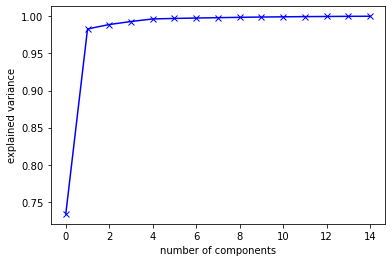

Variance of the each feature :

 [7.33864677e-01 2.49030223e-01 5.94772600e-03 4.07704155e-03
 3.46584323e-03 6.57804933e-04 5.61838589e-04 4.71665772e-04
 4.61722639e-04 3.82898239e-04 3.11013079e-04 2.56592626e-04
 2.01142386e-04 1.84748847e-04 1.25062088e-04]

 Cumulative percentage variance of the each feature :

 [ 73.38646773  98.28949     98.8842626   99.29196676  99.63855108
  99.70433157  99.76051543  99.80768201  99.85385427  99.8921441
  99.92324541  99.94890467  99.96901891  99.98749379 100.        ]


In [10]:
# Apply PCA on all the components
pca_all_comp = decomposition.PCA(n_components=15)
pca_all_comp.fit(df_scaled)

plt.plot(np.cumsum(pca_all_comp.explained_variance_ratio_),'bx-')
plt.xlabel('number of components')
plt.ylabel('explained variance')
plt.show()

print("Variance of the each feature :")
print('\n',pca_all_comp.explained_variance_ratio_)
print("\n Cumulative percentage variance of the each feature :")
print('\n',np.cumsum(pca_all_comp.explained_variance_ratio_*100))

As we can see, the first two components hold more than 95% of the variance.

#### Method - 2 (How many optimal numbers of components acquire 95% of the variance?)

In [11]:
pca = decomposition.PCA(n_components=0.95)
pca.fit(df_scaled)

print("The optimal number of components to maintain 95% variance : {}".format(pca.n_components_))

The optimal number of components to maintain 95% variance : 2


## Visualization of the data for better understanding

#### Figure - 1

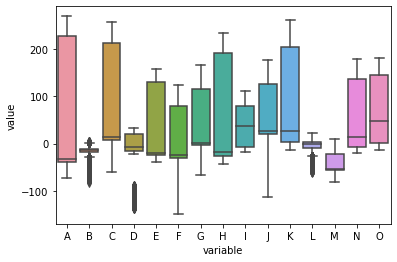

In [12]:
sns.boxplot(x="variable", y="value", data=pd.melt(df.iloc[:,:15]))
plt.show()

Boxplot shows that variable B, D, L have potential outliers. We can see that some features have higher spread and
even negative median value.

#### Figure - 2

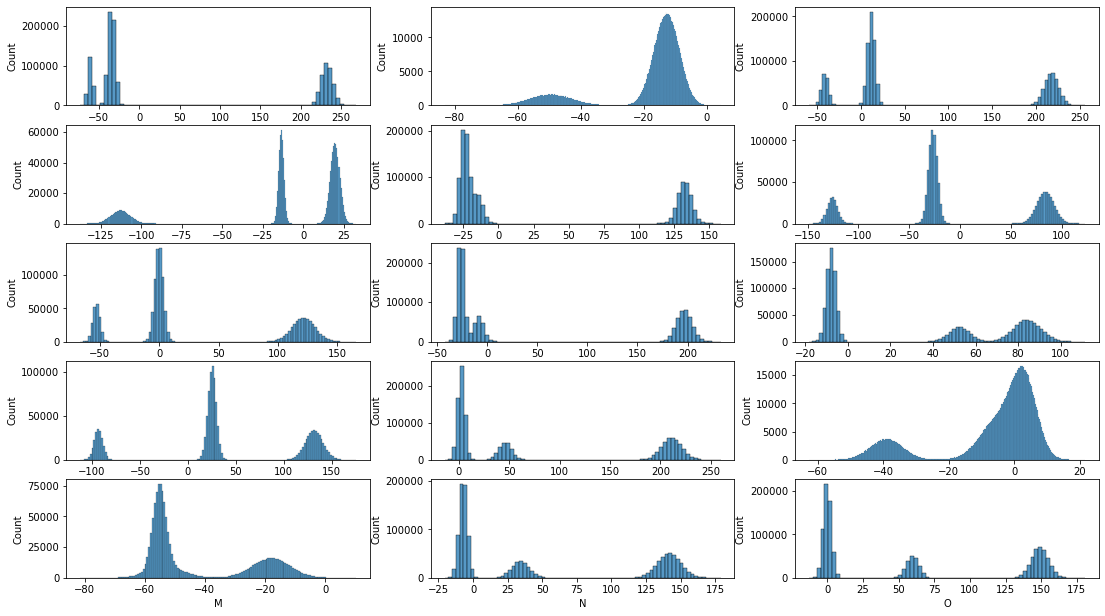

In [13]:
n_rows=5
n_cols=3
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols)
fig.set_size_inches(18.5, 10.5, forward=True)
for i, column in enumerate(df.columns[:15]):
    sns.histplot(df[column],ax=axes[i//n_cols,i%n_cols])

Histplots for univariate distribution and we see that the data has multiple peaks or modes. It dosn't follow normal 
distribution

#### Figure - 3

I decided to plot the features against each other in form of cluster to see if anything interesting showed up. Since there is too much data, I thought it be best to plot in sizes of 100, 1000, & 10000 to get a decent visual. 

Here, I will not plot all the pair of features since it takes too much space, I'll only showcase a few of the plots by skipping a few.

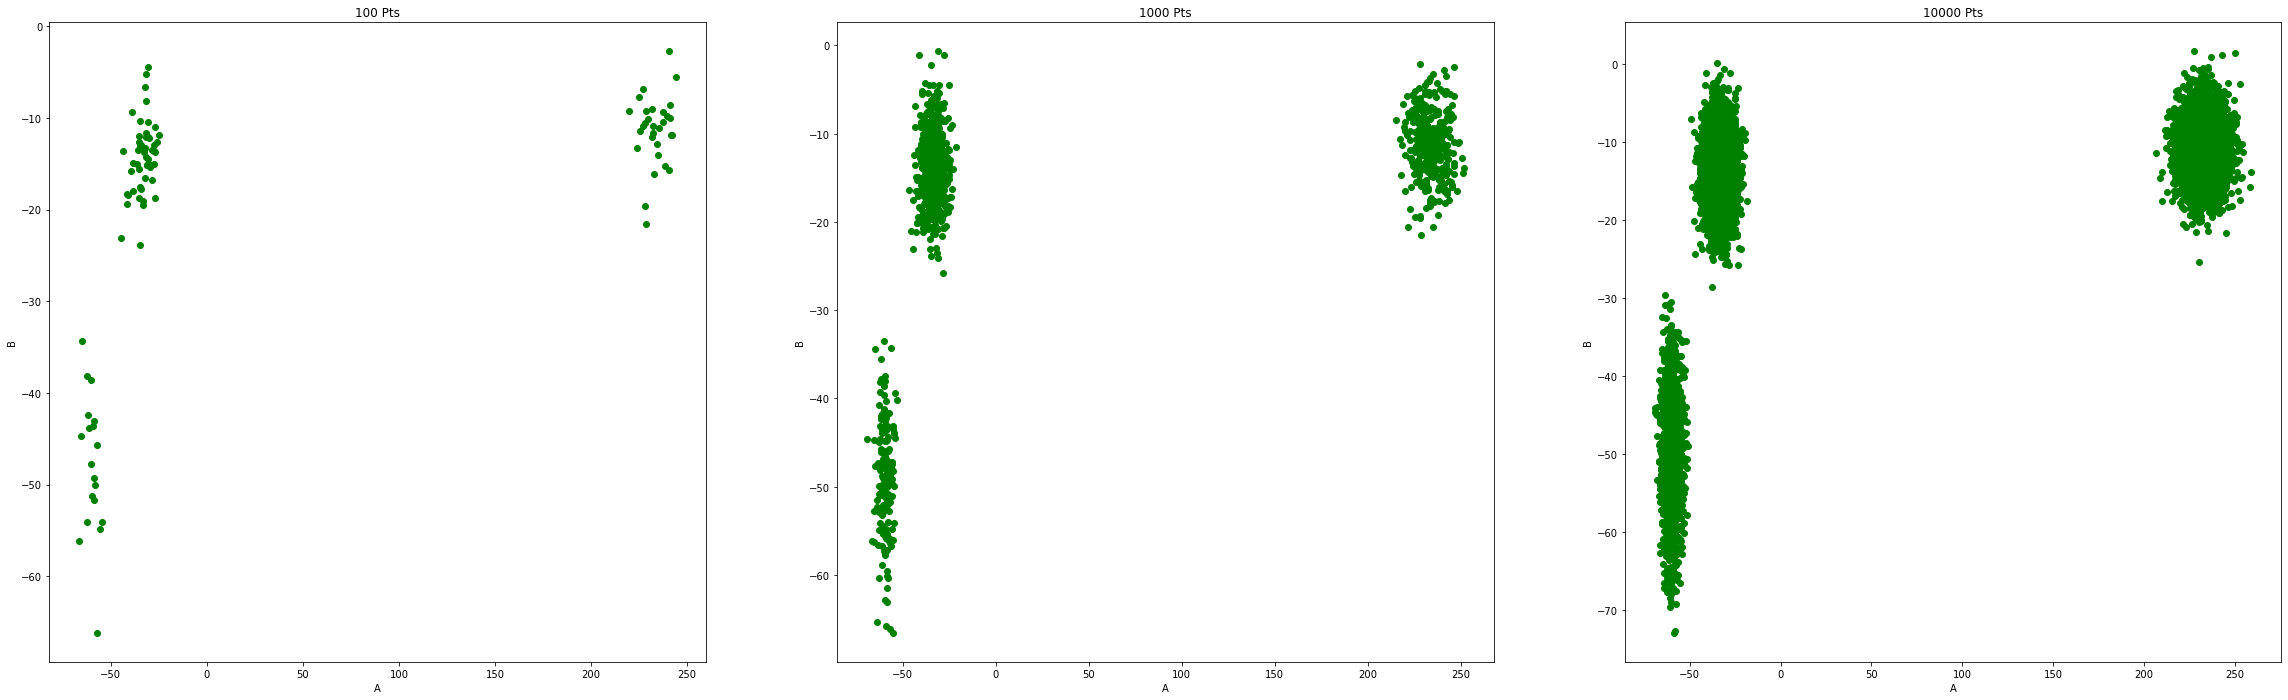

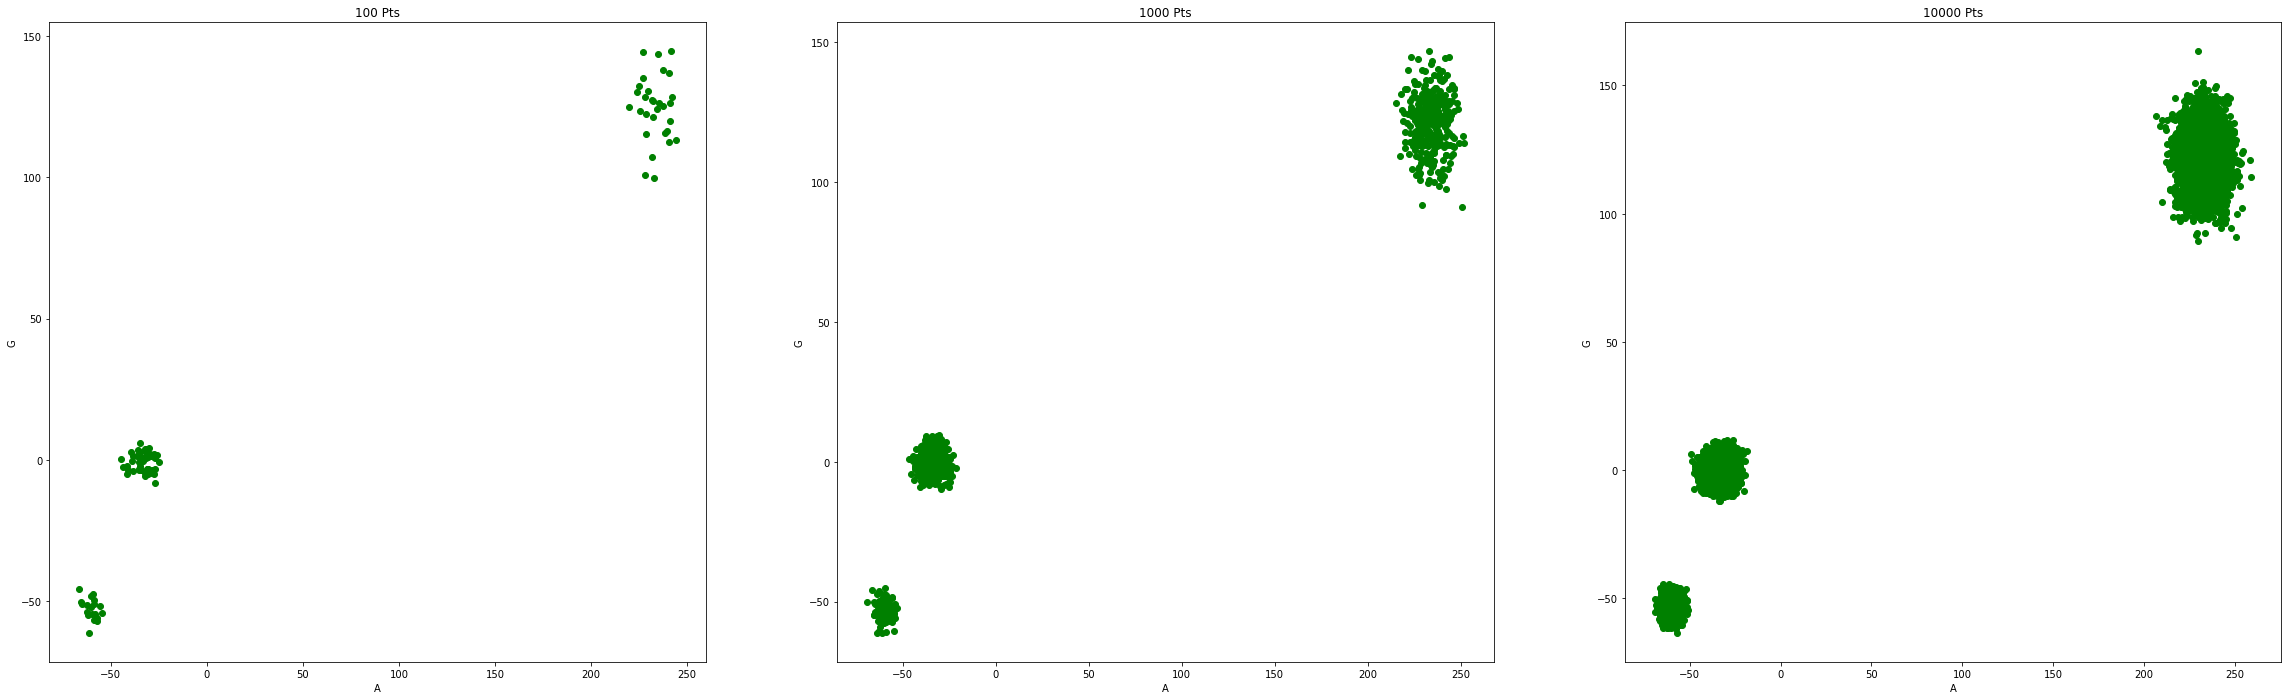

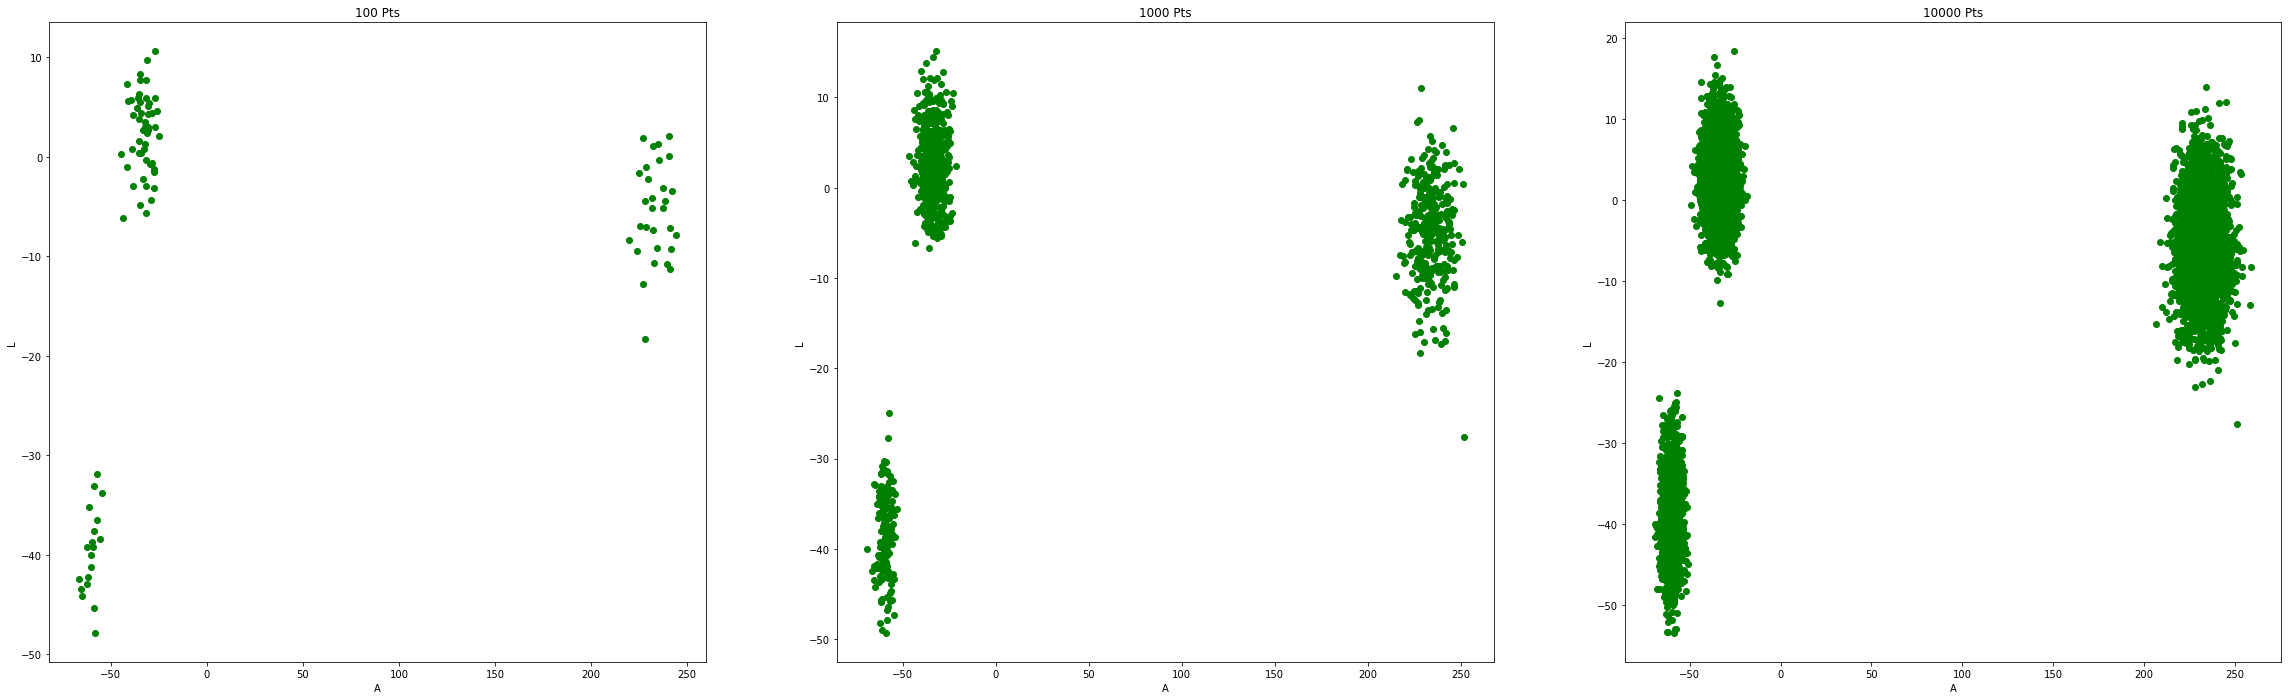

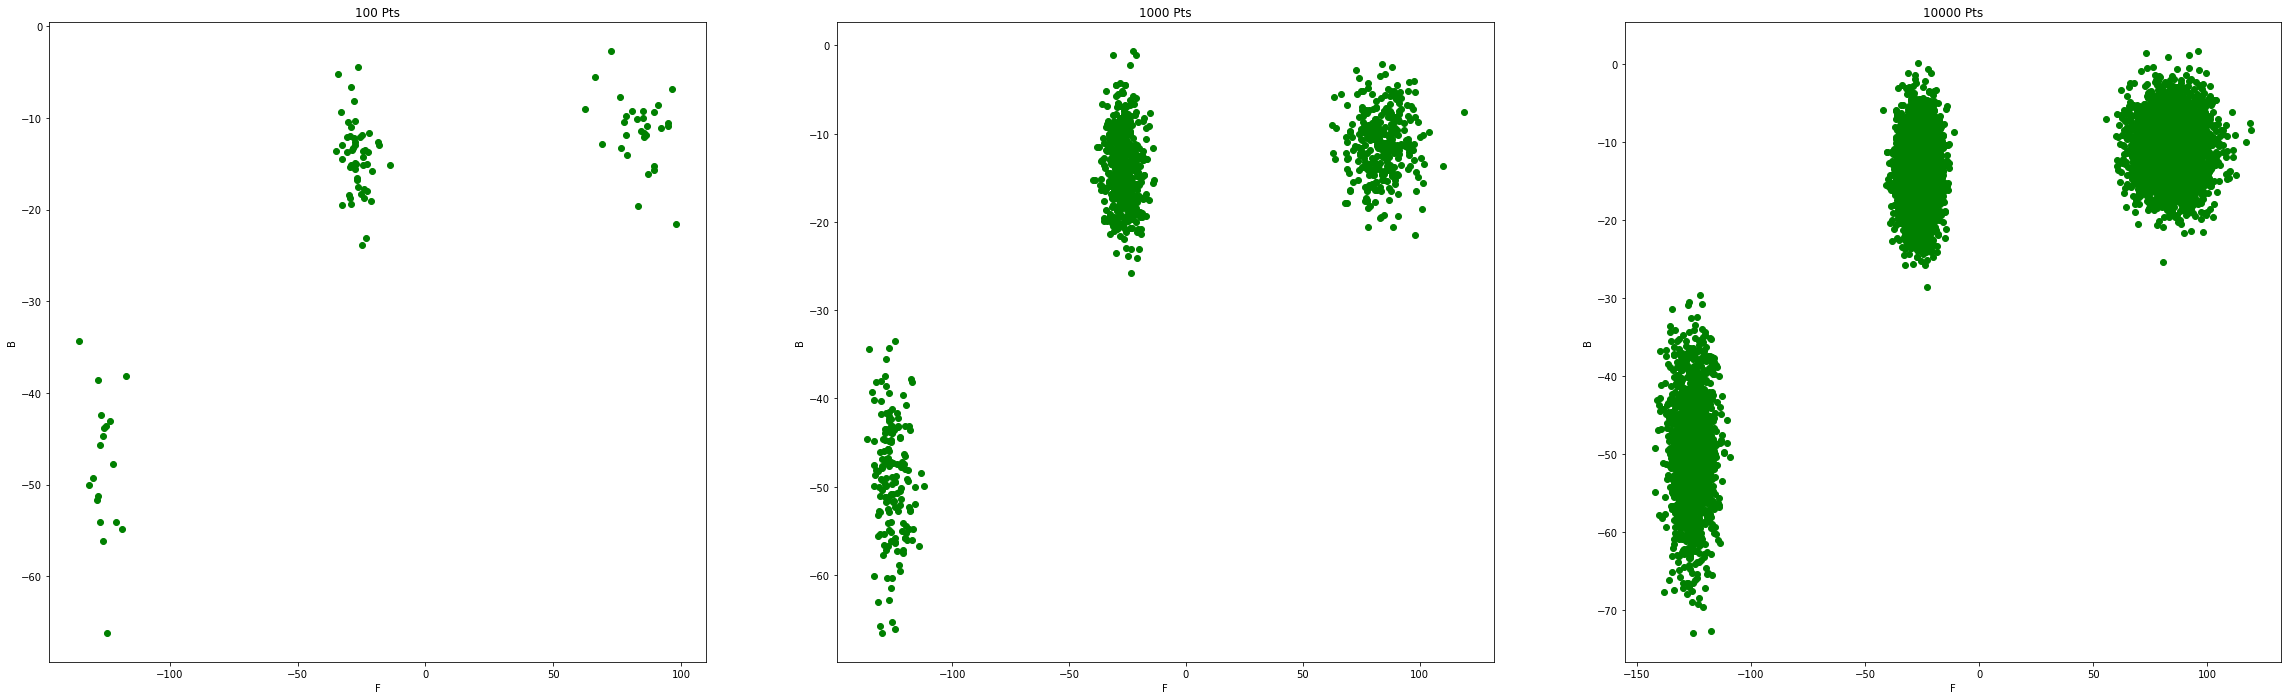

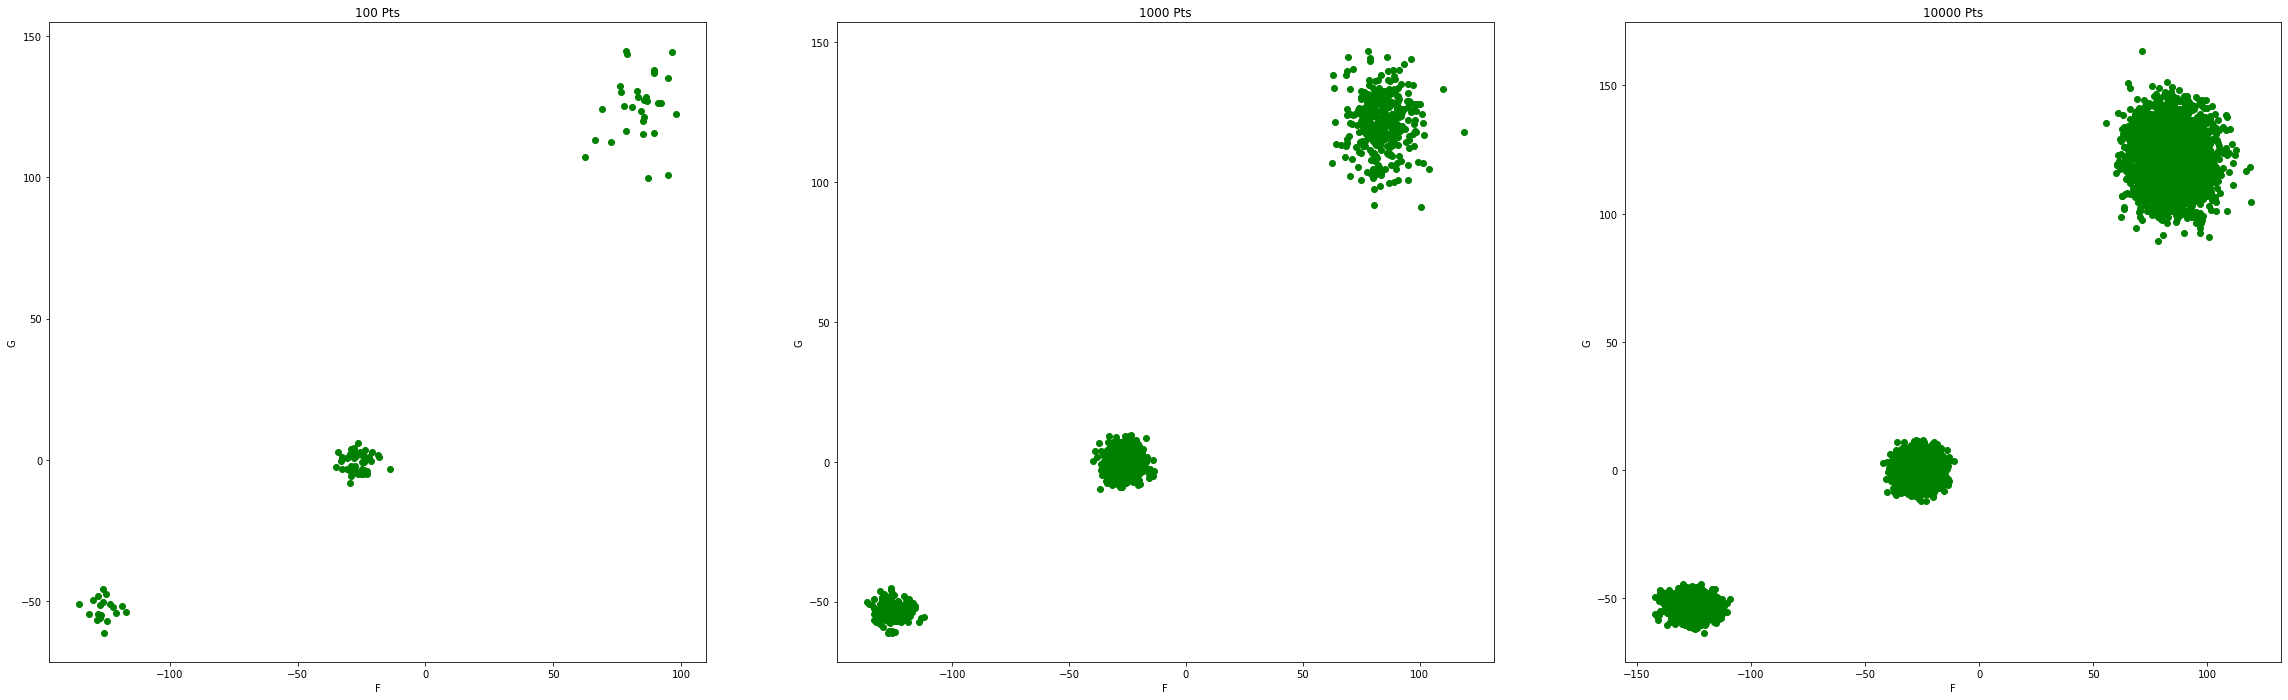

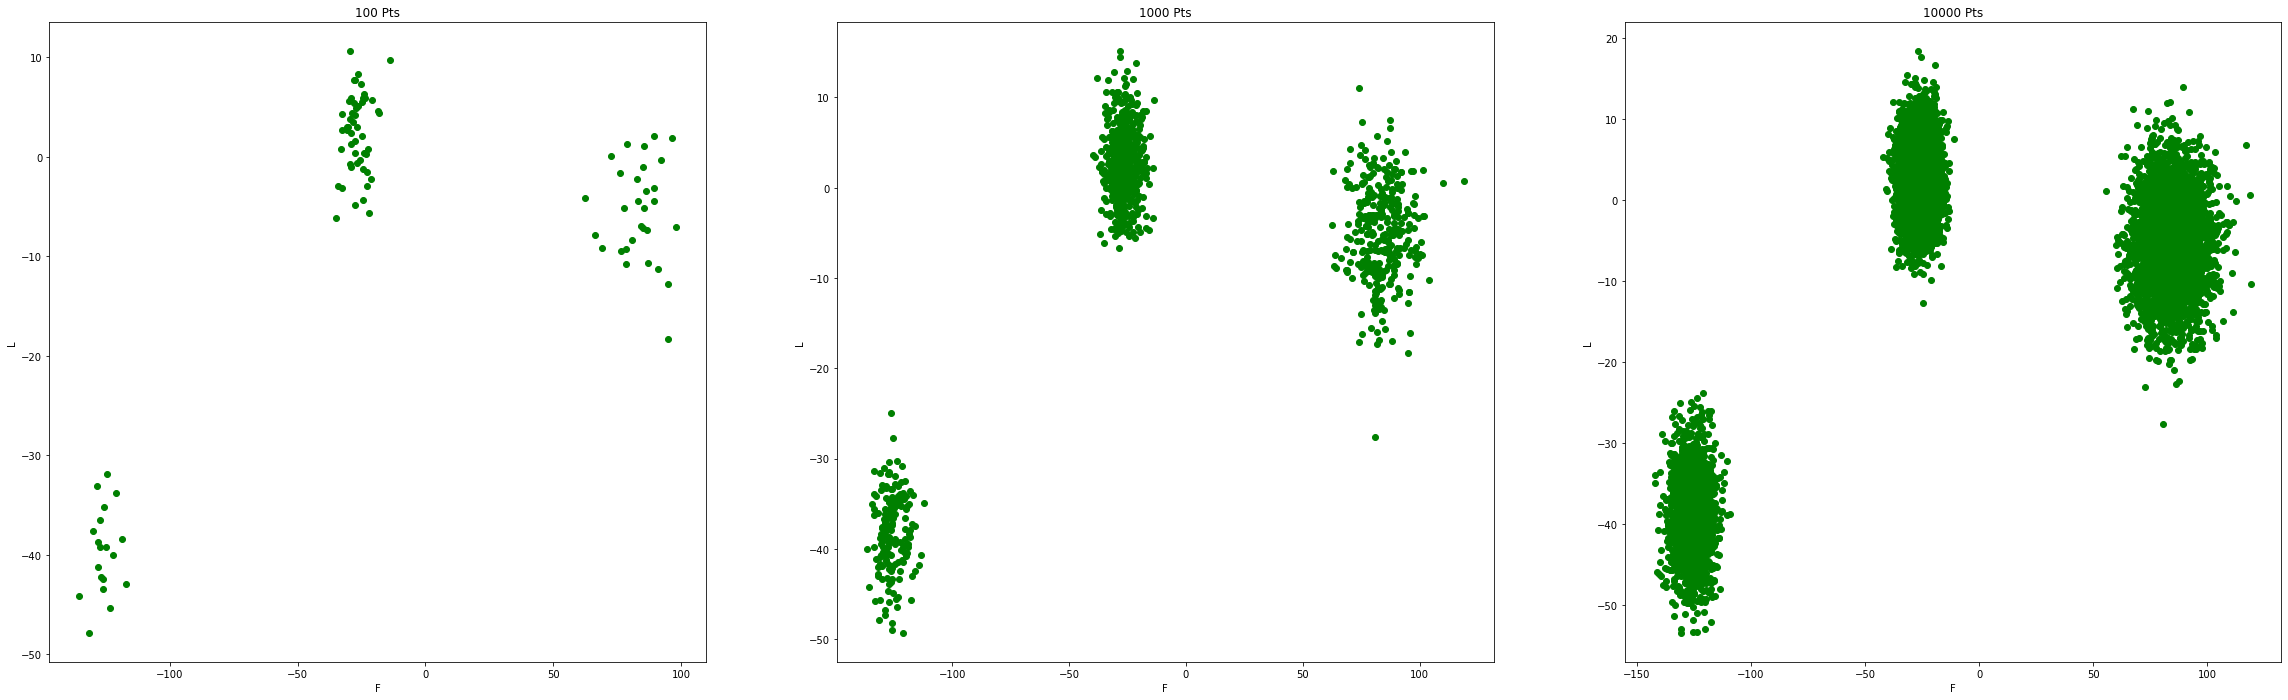

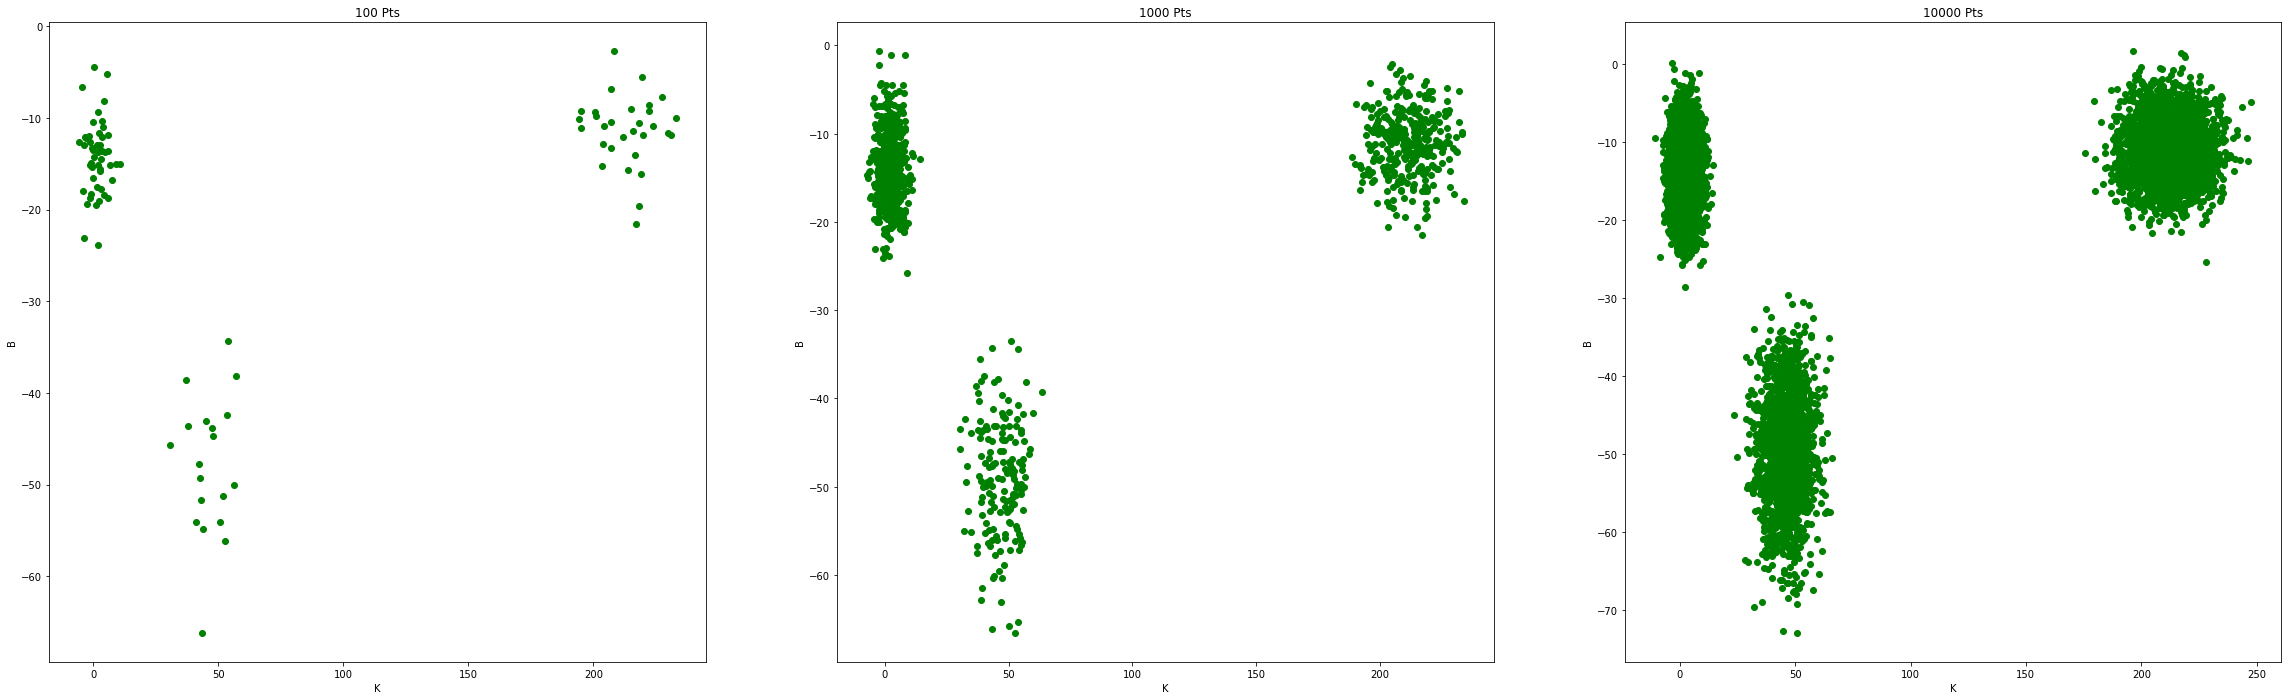

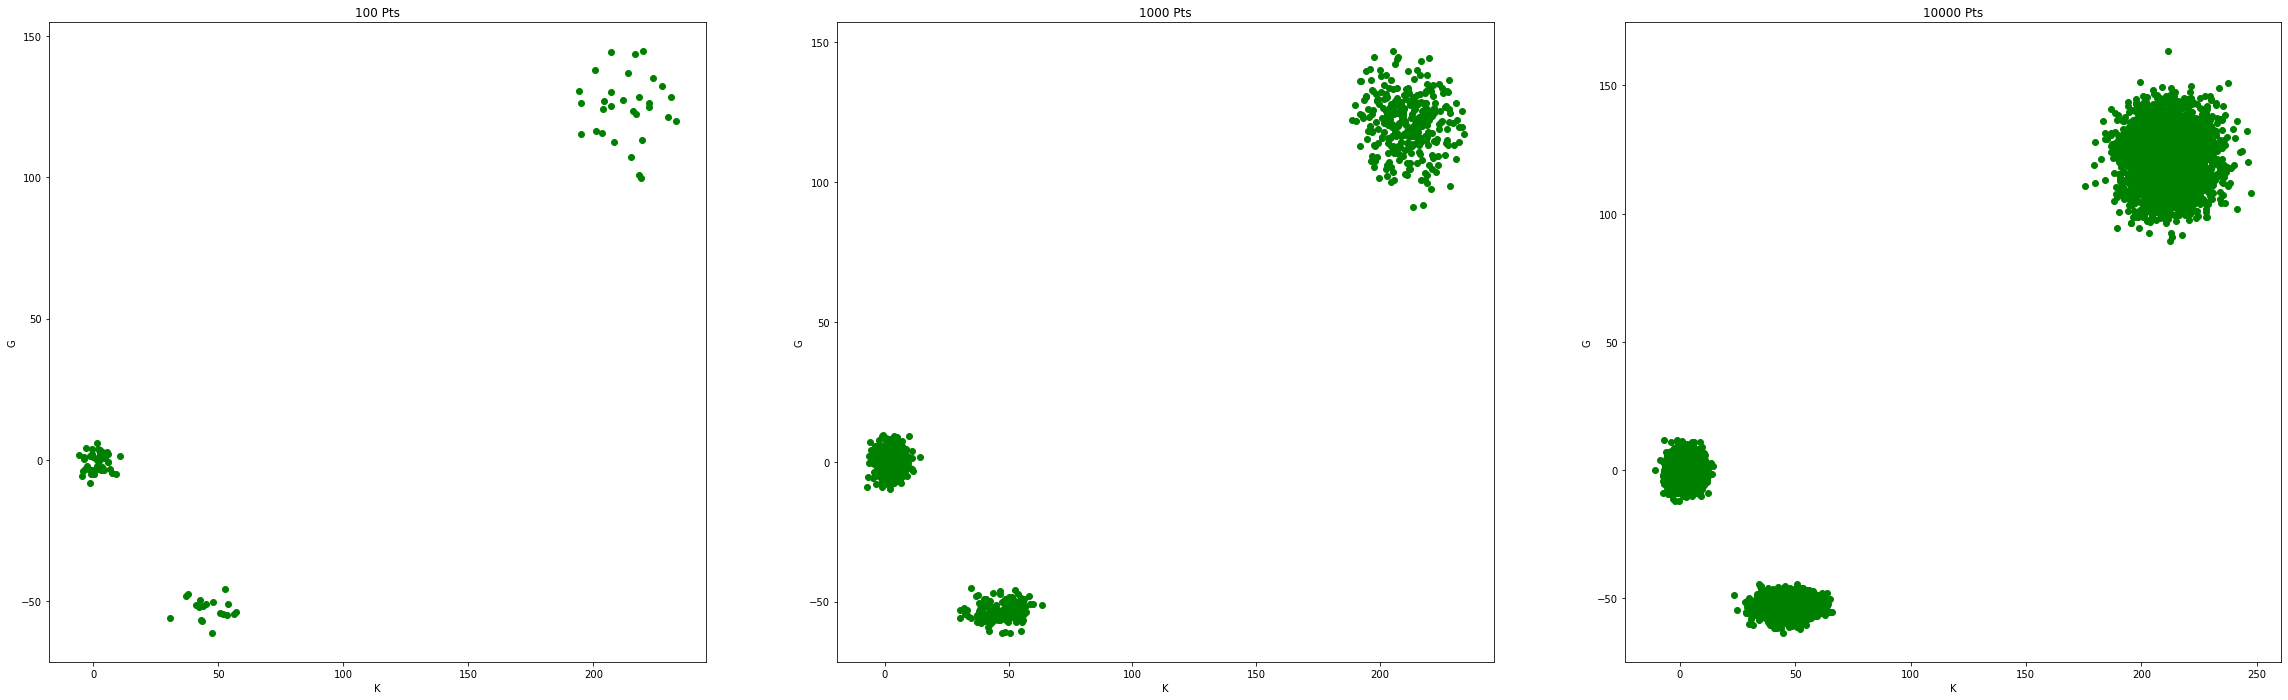

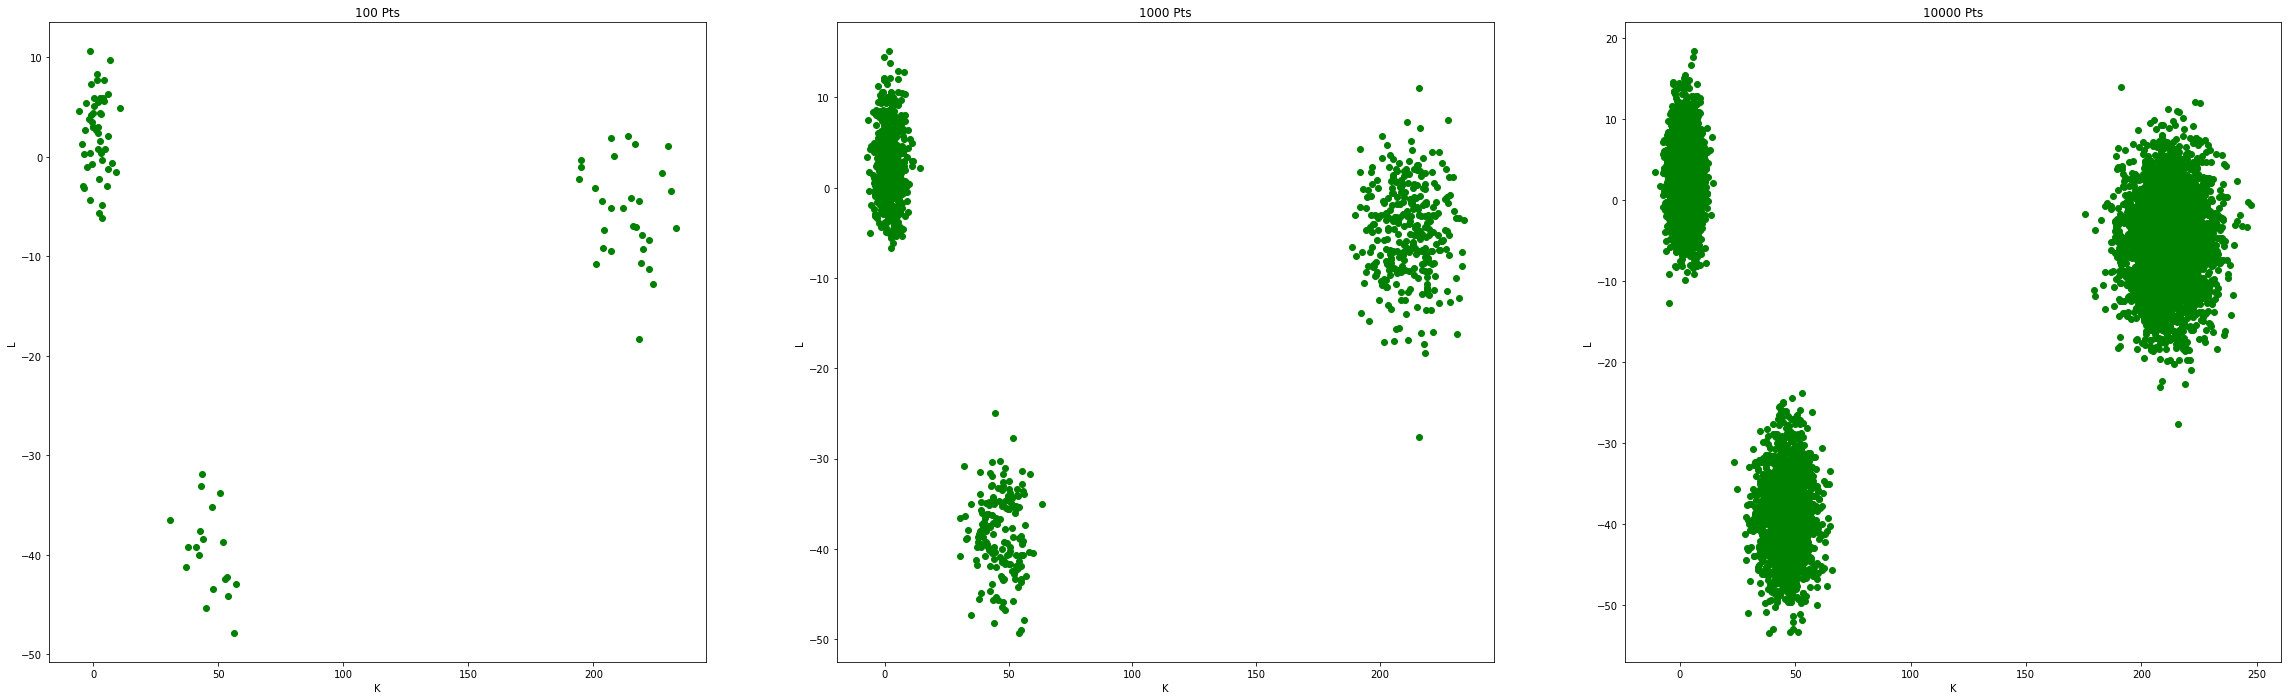

In [14]:
features = training_data.columns[:-1]

for i in range(0, len(features), 5):
    for j in range(1, len(features), 5):
        if i != j:
            plt.figure(figsize=(40, 40))
            plt.subplot(3,3,1)
            plt.plot(training_data[features[i]].head(100), training_data[features[j]].head(100), "go")
            plt.xlabel(features[i])
            plt.ylabel(features[j])
            plt.title("100 Pts")

            plt.subplot(3,3,2)
            plt.plot(training_data[features[i]].head(1000), training_data[features[j]].head(1000), "go")
            plt.xlabel(features[i])
            plt.ylabel(features[j])
            plt.title("1000 Pts")
            
            plt.subplot(3,3,3)
            plt.plot(training_data[features[i]].head(10000), training_data[features[j]].head(10000), "go")
            plt.xlabel(features[i])
            plt.ylabel(features[j])
            plt.title("10000 Pts")
            plt.show()

# What Is a Data Pipeline?

Before getting into the feature selection/extraction and Model training & validation, It is very important to know what is data pipeline? 

A data pipeline is a series of data processing steps. Data has to pass through various operations and stages before mold into the final model.
- Obtaining our data
- Scrubbing / Cleaning our data
- Exploring / Visualizing our data will allow us to find patterns and trends
- Modeling our data will give us our predictive power as a wizard
- Interpreting our data

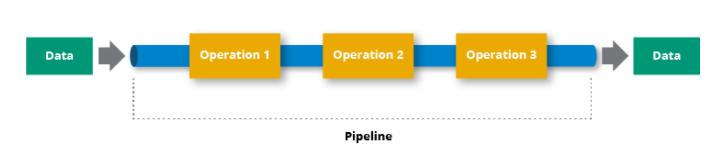

# Feature Extraction, Model Training and Model Validation

## Why I choose classification analysis over cluster analysis ?

In [15]:
K = range(1,10)
Sum_of_squared_distances = []
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X_train)
    Sum_of_squared_distances.append(km.inertia_)

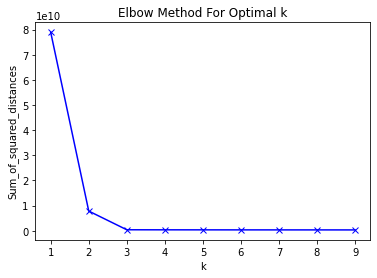

In [16]:
# A plot to display what the optimal K will be
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

We can see that 3 is the optimal k. Now I can utilize this within the pipeline. The pipeline will then be used to predict on the X_test df.

In [17]:
pipeline_cluster=PMMLPipeline([('mapper',DataFrameMapper([(X_train.columns.values,
                                                       [StandardScaler()])])),
                        ('pca',PCA(n_components=2)),
                        ('cluster',KMeans(n_clusters=3))])
pipeline_cluster.fit(X_train,y_train)
results=pipeline_cluster.predict(X_test)
actual=np.concatenate(y_test.values)
print('Accuracy:', metrics.accuracy_score(actual,results))

Accuracy: 0.1669


In [18]:
print('I got just', metrics.accuracy_score(actual,results)*100, 'of the accuracy.')

I got just 16.689999999999998 of the accuracy.


In [19]:
pipeline_c0=PMMLPipeline([('mapper',DataFrameMapper([(X_train.columns.values,
                                                       [StandardScaler()])])),
                        ('pca',PCA(n_components=2)),
                        ('classifier',DecisionTreeClassifier(max_depth=3))])
pipeline_c0.fit(X_train,y_train)
results=pipeline_c0.predict(X_test)
actual=np.concatenate(y_test.values)
print('Accuracy:', metrics.accuracy_score(actual,results))
accuracy_with_all_feature = metrics.accuracy_score(actual,results)*100

Accuracy: 0.5007208333333333


In [20]:
print('I got', accuracy_with_all_feature, 'of the accuracy. which is better than the cluster analysis.')

I got 50.072083333333325 of the accuracy. which is better than the cluster analysis.


## Feature Selection/Extraction

Though It is not a feasible approach, First of all, I am using the brute force approach where one by one I will remove each and every feature and try to identify which feature removals decreased the accuracy of the model. I believed that whatever the features we will get using this method are considered as an important feature and must be retained.

In [21]:
feature_columns='ABCDEFGHIJKLMNO'
for i in range(0,len(feature_columns)):
    pipeline=PMMLPipeline([('mapper',DataFrameMapper([(X_train.columns.drop([feature_columns[i:i+1]]).values,
                                                       [StandardScaler()])])),
                           ('pca',PCA(n_components=2)),
                           ('classifier',DecisionTreeClassifier(max_depth=3))])
    pipeline.fit(training_data.drop([feature_columns[i:i+1]],axis=1),training_data['Class'])
    results=pipeline.predict(X_test)
    actual=np.concatenate(y_test.values)
    print("Dropped feature:",feature_columns[i:i+1],", Accuracy:",metrics.accuracy_score(actual,results))

Dropped feature: A , Accuracy: 0.5006958333333333
Dropped feature: B , Accuracy: 0.500725
Dropped feature: C , Accuracy: 0.5007333333333334
Dropped feature: D , Accuracy: 0.5007333333333334
Dropped feature: E , Accuracy: 0.50075
Dropped feature: F , Accuracy: 0.5007375
Dropped feature: G , Accuracy: 0.5007291666666667
Dropped feature: H , Accuracy: 0.5007375
Dropped feature: I , Accuracy: 0.5007333333333334
Dropped feature: J , Accuracy: 0.5006916666666666
Dropped feature: K , Accuracy: 0.500725
Dropped feature: L , Accuracy: 0.5006625
Dropped feature: M , Accuracy: 0.5007416666666666
Dropped feature: N , Accuracy: 0.5007541666666666
Dropped feature: O , Accuracy: 0.5007375


By analyzing the above result, I can not be able to conclude anything about the importance of the feature, which features we should retain, and which ones are preferable to drop. So, now we have to apply different feature selection techniques to identify the important features.

We have to use supervised technique as our data have a target variable. According to the below link, I will try different filter, wrapper, Embedded methods to identify the correlation between different features.

https://www.analyticsvidhya.com/blog/2020/10/feature-selection-techniques-in-machine-learning/

https://scikit-learn.org/stable/modules/feature_selection.html

<b> Correlation Coefficient : </b>
Correlation is a measure of the linear relationship of 2 or more variables. Through correlation, we can predict one variable from the other. The logic behind using correlation for feature selection is that the good variables are highly correlated with the target. Furthermore, variables should be correlated with the target but should be uncorrelated among themselves.

Throughout the feature selection, I am using RandomForestClassifier().

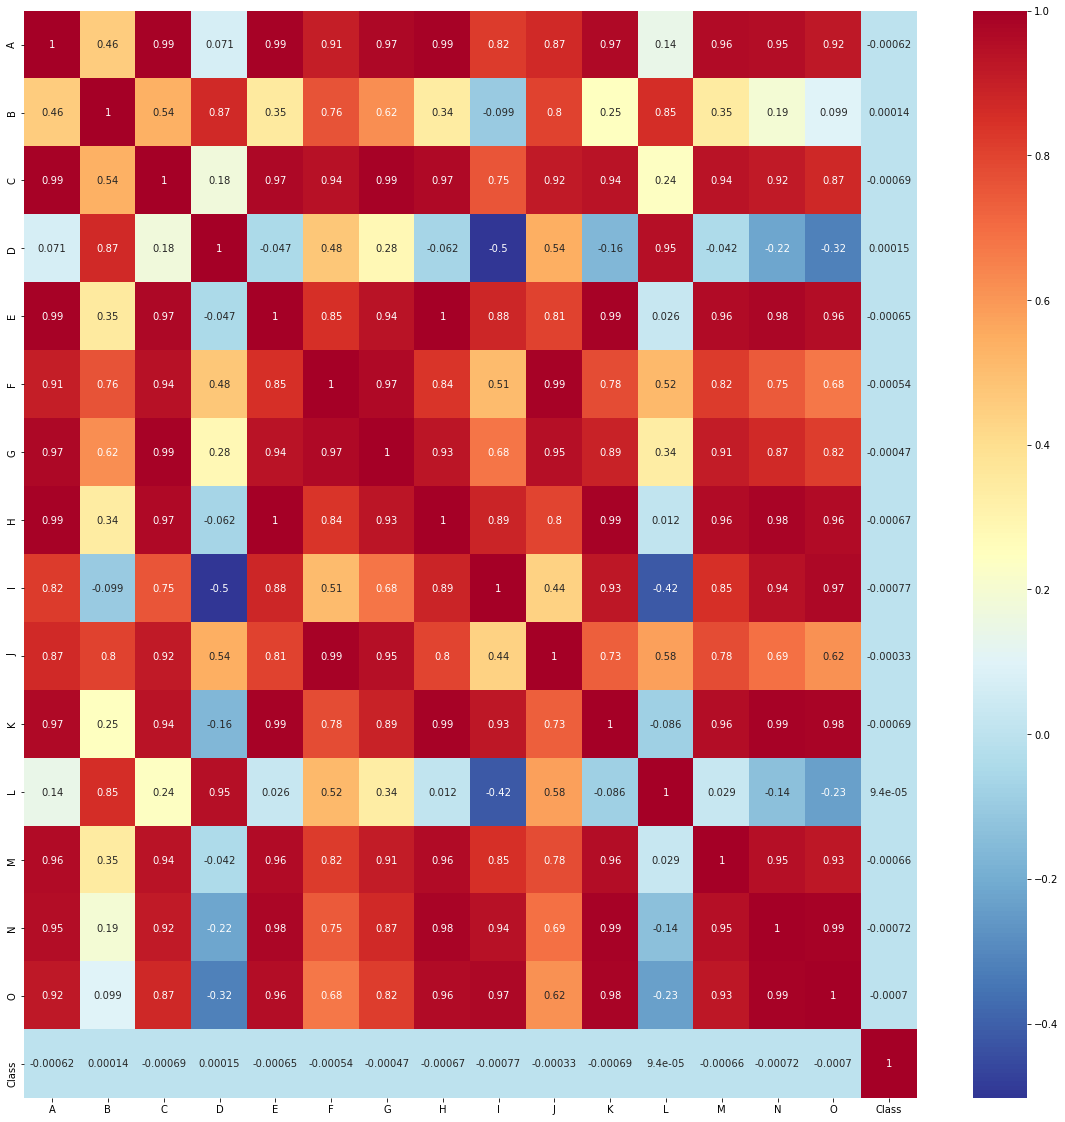

In [22]:
correlation1=df.corr('pearson')
feat=correlation1.index
plt.figure(figsize=(20,20))
plot1=sns.heatmap(df[feat].corr(),annot=True,cmap='RdYlBu_r')

Now I want to find the correlations between the pair of features. From that correlated features, I will get to know that which set of features I should retain and and which ones are preferable to drop.

In [23]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(training_data, 30))

Top Absolute Correlations
E  H    0.997115
K  N    0.992158
A  C    0.992003
H  K    0.990871
A  E    0.990704
F  J    0.989863
E  K    0.989220
N  O    0.988922
A  H    0.988808
C  G    0.988346
K  O    0.982992
H  N    0.982406
E  N    0.979926
A  G    0.972212
C  E    0.971813
I  O    0.970961
F  G    0.969058
A  K    0.968828
C  H    0.968355
E  M    0.964798
H  M    0.964671
   O    0.962886
A  M    0.958953
E  O    0.958899
K  M    0.956621
A  N    0.953094
D  L    0.949514
G  J    0.949436
M  N    0.947426
C  F    0.943501
dtype: float64


After observing the pair of features and correlation heatmap, I decided to follow the approach where if one feature is correlated with other features by 95% or above then we retain only one feature among them, and the rest of the features will be dropped.

With above mentioned approach I divided the features into 3 groups

- A,C,E,F,G,H,I,J,K,M,N,O
- D,L
- B

I am selecting E from first group and D from second group.

I decided to keep (B,D,E) features (from each group I am taking one feature) and finding the accuracy of the model. 

In [24]:
to_keep = ['B','D','E']

pipeline_keep=PMMLPipeline([('mapper',DataFrameMapper([(X_train[to_keep].columns.values,
                                                       [StandardScaler()])])),
                        ('pca',PCA(n_components=2)),
                        ('classifier',RandomForestClassifier(max_depth=3))])
pipeline_keep.fit(X_train,y_train)
results=pipeline_keep.predict(X_test)
actual=np.concatenate(y_test.values)
print('Accuracy:', metrics.accuracy_score(actual,results))

Accuracy: 0.5007416666666666


I decided to drop B because B have a outliers (**Figure - 1**)

In [25]:
to_keep = ['D','E']

pipeline_keep=PMMLPipeline([('mapper',DataFrameMapper([(X_train[to_keep].columns.values,
                                                       [StandardScaler()])])),
                        ('pca',PCA(n_components=2)),
                        ('classifier',RandomForestClassifier(max_depth=3))])
pipeline_keep.fit(X_train,y_train)
results=pipeline_keep.predict(X_test)
actual=np.concatenate(y_test.values)
print('Accuracy:', metrics.accuracy_score(actual,results))

Accuracy: 0.5007458333333333


Still we are getting the accuracy around 50%. So, manual feature selection approach is not working.

Now I am going to apply some feature selection techniques which are explaind in the below link and try to improve my accuracy.
https://scikit-learn.org/stable/modules/feature_selection.html

#### L1-based feature selection

In [26]:
from sklearn.svm import LinearSVC
pipeline_L1=PMMLPipeline([('mapper',DataFrameMapper([(X_train.columns.values,
                                                       [StandardScaler()])])),
                        ('pca',PCA(n_components=15)),
                        ('feature_selection', SelectFromModel(LinearSVC(C=0.01,penalty="l1",dual=False))),
                        ('classifier',RandomForestClassifier(max_depth=3))])
pipeline_L1.fit(X_train,y_train)
results=pipeline_L1.predict(X_test)
actual=np.concatenate(y_test.values)
print('Accuracy:', metrics.accuracy_score(actual,results))

Accuracy: 0.5007416666666666


#### Univariate feature selection - SelectKBest

In [27]:
from sklearn.feature_selection import SelectKBest
   
pipeline_KBest=PMMLPipeline([('mapper',DataFrameMapper([(X_train.columns.values,
                                                           [StandardScaler()])])),
                            ('pca',PCA(n_components=15)),
                            ('feature_selection', SelectKBest(k=3)),
                            ('classifier',RandomForestClassifier(max_depth=3))])
pipeline_KBest.fit(X_train,y_train)
results=pipeline_KBest.predict(X_test)
actual=np.concatenate(y_test.values)
print('Accuracy:', metrics.accuracy_score(actual,results))

Accuracy: 0.5007416666666666


# Suitable classifier

In [28]:
classifier = [LogisticRegression(), 
              DecisionTreeClassifier(max_depth = 3),
              RandomForestClassifier(max_depth = 3), 
              KNeighborsClassifier(), 
              GaussianNB(),
              SGDClassifier(alpha=0.001, max_iter=100)]

for cls in classifier:
    print(cls)
    pipeline = PMMLPipeline([
        ('mapper',
         DataFrameMapper([
             (X_train.columns.values,StandardScaler())])),
        ('pca',
         PCA(n_components=15)),
        ('selector',
         SelectKBest(k=3)),
        ('classifier',cls)
    ])

    pipeline.fit(X_train,y_train)
    results=pipeline.predict(X_test)
    actual=np.concatenate(y_test.values)
    print('Accuracy:', metrics.accuracy_score(actual,results))
    print('\n')

LogisticRegression()
Accuracy: 0.5007416666666666


DecisionTreeClassifier(max_depth=3)
Accuracy: 0.5007458333333333


RandomForestClassifier(max_depth=3)
Accuracy: 0.5007416666666666


KNeighborsClassifier()
Accuracy: 0.41399583333333334


GaussianNB()
Accuracy: 0.5007416666666666


SGDClassifier(alpha=0.001, max_iter=100)
Accuracy: 0.5007416666666666




All the classifier gives me almost same accuracy except KNearest Neighbour (Which is lowest). So, I am using **DecisionTreeClassifier** with max_deapth = 3 in my final pipeline.

# Making model on undersampling of the data

Now I am using totally different approach. I am splitting the data into 3 different dataframe. 

- First dataframe contains the rows having 1 and 2 class labels that is called df12.
- Second dataframe contains the rows having 1 and 3 class labels that is called df13.
- Third dataframe contains the rows having 2 and 3 class labels that is called df23.

Then I am making three separate models and find the accuracy for each one. Which will give me insight that which label has more weightage on the data. 

In [29]:
df1 = df[df['Class'] == 1]
df2 = df[df['Class'] == 2]
df3 = df[df['Class'] == 3]
df12=pd.concat([df1,df2])
df13=pd.concat([df1,df3])
df23=pd.concat([df2,df3])

- Now I am implementing some functions to split the data, scale the data. 
- Implement the function which gives me the optimal component of the dataframe using PCA.
- Implement the function to find accuracy using pipeline

In [30]:
def SplitTheData(df):
    X = df.iloc[:, 0:15]
    y = df.iloc[:, 15:16]
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
    return X_train,X_test,y_train,y_test

def ScaleTheData(df):
    features = df.columns
    scaler = StandardScaler()
    df_scaled = pd.DataFrame(scaler.fit_transform(df.drop('Class',axis=1)))
    return df_scaled

def PCA_RequitedComponents(df_scaled):
    pca = decomposition.PCA(n_components=0.95)
    pca.fit(df_scaled)
    return pca.n_components_

def FindAccuracy(X_train,y_train,X_test,y_test):
    pipeline=PMMLPipeline([('mapper',DataFrameMapper([(X_train.columns.values,
                                                       [StandardScaler()])])),
                        ('pca',PCA(n_components=2)),
                        ('classifier',DecisionTreeClassifier(max_depth=3))])
    pipeline.fit(X_train,y_train)
    results=pipeline.predict(X_test)
    actual=np.concatenate(y_test.values)
    print('\n Confusion Matrix')
    print(metrics.confusion_matrix(actual,results))
    print('\n classification Report')
    print(metrics.classification_report(actual,results))
    return metrics.accuracy_score(actual,results)

In [31]:
X12_train,X12_test,y12_train,y12_test = SplitTheData(df12)
X13_train,X13_test,y13_train,y13_test = SplitTheData(df13)
X23_train,X23_test,y23_train,y23_test = SplitTheData(df23)

print("The optimal number of components to maintain 95% variance for df12: {}".format(PCA_RequitedComponents(ScaleTheData(df12))))
print("The optimal number of components to maintain 95% variance for df13: {}".format(PCA_RequitedComponents(ScaleTheData(df13))))
print("The optimal number of components to maintain 95% variance for df23: {}".format(PCA_RequitedComponents(ScaleTheData(df23))))

print("\n Accuracy of the model with for df12 dataframe where we consider the rows having 1 and 2 class labels :",FindAccuracy(X12_train,y12_train,X12_test,y12_test))
print("\n Accuracy of the model with for df13 dataframe where we consider the rows having 1 and 3 class labels :",FindAccuracy(X13_train,y13_train,X13_test,y13_test))
print("\n Accuracy of the model with for df23 dataframe where we consider the rows having 2 and 3 class labels :",FindAccuracy(X23_train,y23_train,X23_test,y23_test))

The optimal number of components to maintain 95% variance for df12: 2
The optimal number of components to maintain 95% variance for df13: 2
The optimal number of components to maintain 95% variance for df23: 2

 Confusion Matrix
[[     0  39995]
 [     4 119845]]

 classification Report
              precision    recall  f1-score   support

           1       0.00      0.00      0.00     39995
           2       0.75      1.00      0.86    119849

    accuracy                           0.75    159844
   macro avg       0.37      0.50      0.43    159844
weighted avg       0.56      0.75      0.64    159844


 Accuracy of the model with for df12 dataframe where we consider the rows having 1 and 2 class labels : 0.7497622682115063

 Confusion Matrix
[[    2 39845]
 [    4 80304]]

 classification Report
              precision    recall  f1-score   support

           1       0.33      0.00      0.00     39847
           3       0.67      1.00      0.80     80308

    accuracy           

I got the higher accuracy for the model which we have made from the df12 dataframe. 

In [32]:
print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df12.shape)
print(df13.shape)
print(df23.shape)

(199992, 16)
(599228, 16)
(400780, 16)
(799220, 16)
(600772, 16)
(1000008, 16)


As we can see the highest number of the rows have class label 2. 

**So, Undersampling of the data is required.**

In [33]:
# Undersampling of the data by random selection.
class1=df1
class3=df3.sample(n=199992) # select 199992 rows randomly
class2=df2.sample(n=199992) # select 199992 rows randomly
df_with_sampling=pd.concat([class1,class2,class3])
df_with_sampling

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,Class
11,-23.413125,-11.119531,16.910592,18.915184,-25.170026,-28.504337,-2.371616,-26.557941,-4.756554,20.160979,3.415932,8.147177,-52.641582,-6.348362,0.196517,1
12,-29.249384,-13.486606,9.719229,18.708490,-21.304944,-34.440508,-1.884057,-26.843994,-9.007811,22.341808,0.406326,9.528769,-55.168137,-6.629304,-2.431450,1
15,-39.238696,-18.604404,15.525642,17.059754,-23.125142,-34.300873,6.034945,-25.488902,-1.199718,28.432906,0.936562,-1.849208,-54.797583,-6.948486,-1.864320,1
24,214.501120,-12.386835,220.170860,-11.482754,136.266760,84.174828,113.271746,202.299392,79.514846,142.781926,208.605238,-9.476301,-10.421123,148.194823,162.473233,1
28,244.410014,-11.742173,224.945971,-11.031026,131.058794,83.866057,131.314049,192.609849,88.551907,139.349595,198.459609,-1.424212,-21.137536,137.913016,152.200131,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
414898,220.252792,-12.445251,228.549879,-15.188049,136.968363,88.931645,127.123562,217.430116,82.055721,146.100794,194.012262,-4.652562,-15.558462,144.189219,148.336126,3
769780,-34.976800,-11.454732,15.273580,20.770186,-29.434831,-30.651293,-2.727978,-22.530576,-13.057073,28.944970,-1.007470,1.550150,-52.124939,-7.430847,2.175287,3
1046848,221.387757,-15.864191,198.715416,-10.662085,137.443924,83.521395,127.981545,213.514370,86.458663,123.687976,213.903480,-6.217232,-4.756785,139.686313,156.636282,3
1150784,-56.821837,-47.691036,-53.794490,-122.438180,-13.757492,-131.461159,-54.954805,-13.652408,51.232848,-95.968326,37.042218,-33.396316,-44.222192,36.299707,65.167843,3


- For sampling of the data for all the labels, we should use

from imblearn.under_sampling  import NearMiss

smk=NearMiss()
X_res,y_res = smk.fit_resample(df.drop('Class',axis=1),df['Class'])

- I have never implemented above method but according to the below link this is the correct way to do undersampling specially when your data is imbalanced Classification data.

https://machinelearningmastery.com/undersampling-algorithms-for-imbalanced-classification/

In [34]:
print("The optimal number of components to maintain 95% variance in newly created sampled data frame: {}".format(PCA_RequitedComponents(ScaleTheData(df_with_sampling))))

The optimal number of components to maintain 95% variance in newly created sampled data frame: 2


In [35]:
XN_train,XN_test,yN_train,yN_test = SplitTheData(df_with_sampling)
print("Accuracy of the model which we have made from the dataframe with sampling data :",FindAccuracy(XN_train,yN_train,XN_test,yN_test))


 Confusion Matrix
[[  361  3236 36383]
 [  307  3358 36448]
 [  309  3317 36277]]

 classification Report
              precision    recall  f1-score   support

           1       0.37      0.01      0.02     39980
           2       0.34      0.08      0.13     40113
           3       0.33      0.91      0.49     39903

    accuracy                           0.33    119996
   macro avg       0.35      0.33      0.21    119996
weighted avg       0.35      0.33      0.21    119996

Accuracy of the model which we have made from the dataframe with sampling data : 0.33331111037034566


- **We are not getting higher accuracy because we are doing undersampling of the data using the random selection.**

- **According to my point of view and understanding, if we are doing undersampling of the data using NearMiss() and use those train and test data to make a model then we will get more decent model and will get higher accuracy.** 

# Final Model: ONNX Implementation

In [36]:
transformer = Pipeline(steps=[
    ('scaler',
     StandardScaler())
])

preprocessor = ColumnTransformer(transformers=[
    ('feature',
     transformer,
     df.columns[0:15])
])

classifier = DecisionTreeClassifier(max_depth = 3)

In [37]:
pipeline = Pipeline([
    ('precprocessor',
     preprocessor),
    ('pca',
     PCA(n_components=3)),
    ('selector',
     SelectKBest(k=2)),
    ('classifier',
     classifier)
])

pipeline.fit(X_train, y_train);

In [38]:
print(metrics.accuracy_score(y_test.values.ravel(),pipeline.predict(X_test)))

0.5007208333333333


Covert pipeline to ONNX file.

In [39]:
input_types = dict([(x, FloatTensorType([None, 1])) for x in X_train.columns.values])

try:
    model_onnx = convert_sklearn(pipeline,
                                 'pipeline_onnx',
                                initial_types=list(input_types.items()))
except Exception as e:
    print(e)

with open("./pipeline/pipeline.onnx", "wb") as f:
    f.write(model_onnx.SerializeToString())

In [40]:
inputs_onnx = {k: np.array(v).astype(np.float32)[:, np.newaxis] for k, v in X_test.to_dict(orient='list').items()}

session_onnx = rt.InferenceSession("./pipeline/pipeline.onnx")
predict_onnx = session_onnx.run(None, inputs_onnx)
print("predict", predict_onnx[0])

predict [2 2 2 ... 2 2 2]


In [41]:
np.unique(np.array(predict_onnx[0]), return_counts=True)

(array([1, 2, 3], dtype=int64), array([     3, 239988,      9], dtype=int64))

In [42]:
np.unique(predict_onnx[0] == testing_data.iloc[:,15], return_counts=True)

(array([False,  True]), array([119827, 120173], dtype=int64))

# Conclusion

- Data after cleaning and EDA : Data is multimodal with few outliers and doesn't follow normal distribution
- Optimal Dimensionality is 2
- Scaling and transformation improve accuracy
- This is a mutliclass classification problem and models which are better in multiclassification improve accuracy.
- Results of feature selection at a certain extent are inconclusive.
- Use of Pipeline can save time and streamine process.
- High correlation found between the features.
- We can achieve the higher accuracy with sampling of the data.
- Segregating data on basis of class and using binary classfiers improve accuracy and provide better estimate

# Reference :

https://www.pluralsight.com/guides/evaluating-a-data-mining-model

https://www.analyticsvidhya.com/blog/2020/01/build-your-first-machine-learning-pipeline-using-scikit-learn/

https://hazelcast.com/glossary/data-pipeline/

https://www.analyticsvidhya.com/blog/2020/10/feature-selection-techniques-in-machine-learning/

https://scikit-learn.org/stable/modules/feature_selection.html

https://stackoverflow.com/questions/17778394/list-highestcorrelation-pairs-from-a-large-correlation-matrix-in-pandas

Notebook: Individual Project - Pipeline - ONNX - Example.ipynb

Notebook: Individual Project - Pipeline - PMML - Example.ipynb

Example: Example Project - Spring 2019 - Victoria Belotti.pdf